In [ ]:
__author__ = "Ricardo Primi adapted from notebook of Transformers from NLP Udemy"

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import sys
sys.path.append('/content/drive/MyDrive/unicamp - IA024 /projeto_metaf')


Mounted at /content/drive


In [1]:
!nvidia-smi

Sat Nov 26 20:44:46 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8    12W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install transformers datasets

In [ ]:
# https://www.kaggle.com/crowdflower/twitter-airline-sentiment
#!wget -nc https://lazyprogrammer.me/course_files/AirlineTweets.csv

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

import torch

from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
#df_ = pd.read_csv('AirlineTweets.csv')
bd_metaf = pd.read_csv("/content/drive/MyDrive/unicamp - IA024 /projeto_metaf/dt_metaf_unicamp.csv") 
bd_metaf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12174 entries, 0 to 12173
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   iddd2          12174 non-null  object
 1   Código         12173 non-null  object
 2   Item           12174 non-null  object
 3   n_resposta     12174 non-null  int64 
 4   train_subj     12174 non-null  int64 
 5   resp_relacao3  12174 non-null  object
 6   y_theta        12174 non-null  int64 
 7   y_score1       12174 non-null  int64 
 8   y_score2       12174 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 856.1+ KB


In [ ]:
#df_.head()
bd_metaf.head()


,iddd2,Código,Item,n_resposta,train_subj,resp_relacao3,y_theta,y_score1,y_score2
0,M0001F011,M0001,F01,1,1,Macaco é o Tarzan da Floresta. Porque vive nas...,3,1,1
1,M0001F012,M0001,F01,2,1,Macaco é o comunicador da Floresta. Porque avi...,2,0,0
2,M0001F013,M0001,F01,3,1,Macaco é o semeador da Floresta. Porque ele jo...,3,1,1
3,M0001E021,M0001,E02,1,1,Grama é o protetora da Terra. Protege do sol e...,2,0,0
4,M0001E022,M0001,E02,2,1,Grama é o tapete da Terra. É macio e gostoso d...,3,1,1


In [ ]:
#df = df_[['airline_sentiment', 'text']].copy()

In [ ]:
#df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


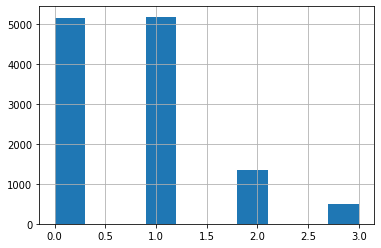

In [ ]:
#df['airline_sentiment'].hist()
bd_metaf["y_score1"].hist()

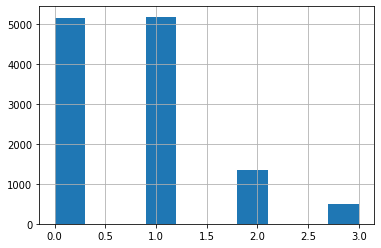

In [ ]:
#target_map = {'positive': 1, 'negative': 0, 'neutral': 2}
#df['target'] = df['airline_sentiment'].map(target_map)

#target_map = {'not a metaf': 0, 'simple metaf': 1, 'good metaf': 2, 'very creative metaf': 3 }
bd_metaf['target'] = bd_metaf['y_score1']


bd_metaf["y_score1"].hist()

In [ ]:
#df2 = df[['text', 'target']]
#df2.columns = ['sentence', 'label']
#df2.to_csv('data.csv', index=None)

In [ ]:
df_train = bd_metaf.query('train_subj ==1')[['resp_relacao3', 'y_score1']]
df_train.columns = ['sentence', 'label'] 

df_test = bd_metaf.query('train_subj ==0')[['resp_relacao3', 'y_score1']]
df_test.columns = ['sentence', 'label'] 

df_train.to_csv('df_train.csv', index=None)
df_test.to_csv('df_test.csv', index=None)

In [ ]:
!head df_train.csv

sentence,label
Macaco é o Tarzan da Floresta. Porque vive nas árvores,1
Macaco é o comunicador da Floresta. Porque avisa os outros animais do perigo,0
Macaco é o semeador da Floresta. Porque ele joga as sementes das frutas no chão,1
Grama é o protetora da Terra. Protege do sol e da chuva,0
Grama é o tapete da Terra. É macio e gostoso de andar,1
Grama é o pele da Terra. Porque protege,0
Grama é o casaco da Terra. Porque agasalha a pele,0
Estrelas é o olhos da Noite. Porque observam a noite,0
Estrelas é o fendas da Noite. Aberturas da noite,0


In [ ]:
#from datasets import load_dataset
#raw_dataset = load_dataset('csv', data_files='data.csv')

Using custom data configuration default-6a8f9b8cba270064


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-6a8f9b8cba270064/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#raw_dataset

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label'],
        num_rows: 14640
    })
})

In [ ]:
#split = raw_dataset['train'].train_test_split(test_size=0.3, seed=42)

In [ ]:
#split

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label'],
        num_rows: 10248
    })
    test: Dataset({
        features: ['sentence', 'label'],
        num_rows: 4392
    })
})

In [ ]:
# if you have multiple csv files
# load_dataset('csv', data_files=['file1.csv', 'file2.csv'])

In [ ]:
# if you already have a train-test split:
# load_dataset(
#     'csv',
#     data_files={'train': ['train1.csv', 'train2.csv'],
#                 'test': 'test.csv'
#     }
# )

In [ ]:
from datasets import load_dataset
raw_dataset = load_dataset(
    'csv',
     data_files={'train': 'df_train.csv',
                 'test': 'df_test.csv'
     }
 )



Extracting data files #0:   0%|          | 0/1 [00:00<?, ?obj/s]

Extracting data files #1:   0%|          | 0/1 [00:00<?, ?obj/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-b4e1fc72a7d372e4/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
raw_dataset

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label'],
        num_rows: 9507
    })
    test: Dataset({
        features: ['sentence', 'label'],
        num_rows: 2667
    })
})

In [ ]:
#checkpoint = 'neuralmind/bert-base-portuguese-cased'

checkpoint = 'neuralmind/bert-large-portuguese-cased'

In [ ]:
from transformers import AutoTokenizer

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

Downloading:   0%|          | 0.00/155 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/648 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/210k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
def tokenize_fn(batch):
  return tokenizer(batch['sentence'], truncation=True)

In [ ]:
tokenized_datasets = raw_dataset.map(tokenize_fn, batched=True)

  0%|          | 0/10 [00:00<?, ?ba/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


  0%|          | 0/3 [00:00<?, ?ba/s]

In [ ]:
from transformers import AutoModelForSequenceClassification, \
  Trainer, TrainingArguments

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(
    checkpoint, num_labels=4)

Downloading:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Some weights of the model checkpoint at neuralmind/bert-large-portuguese-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from th

In [ ]:
!pip install torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from torchinfo import summary

In [ ]:
summary(model)

Layer (type:depth-idx)                                  Param #
BertForSequenceClassification                           --
├─BertModel: 1-1                                        --
│    └─BertEmbeddings: 2-1                              --
│    │    └─Embedding: 3-1                              30,509,056
│    │    └─Embedding: 3-2                              524,288
│    │    └─Embedding: 3-3                              2,048
│    │    └─LayerNorm: 3-4                              2,048
│    │    └─Dropout: 3-5                                --
│    └─BertEncoder: 2-2                                 --
│    │    └─ModuleList: 3-6                             302,309,376
│    └─BertPooler: 2-3                                  --
│    │    └─Linear: 3-7                                 1,049,600
│    │    └─Tanh: 3-8                                   --
├─Dropout: 1-2                                          --
├─Linear: 1-3                                           4,100
Total params:

In [ ]:
training_args = TrainingArguments(
  output_dir='training_dir',
  evaluation_strategy='epoch',
  save_strategy='epoch',
  num_train_epochs=3,
  per_device_train_batch_size=16,
  per_device_eval_batch_size=64,
)

In [ ]:
def compute_metrics(logits_and_labels):
  logits, labels = logits_and_labels
  predictions = np.argmax(logits, axis=-1)
  acc = np.mean(predictions == labels)
  f1 = f1_score(labels, predictions, average='micro')
  return {'accuracy': acc, 'f1': f1}

In [ ]:
trainer = Trainer(
    model,
    training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

In [ ]:
trainer.train()

The following columns in the training set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: sentence. If sentence are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 9507
  Num Epochs = 3
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 1785
  Number of trainable parameters = 334400516
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.944700,0.872955,0.637045,0.637045
2,0.760200,0.898759,0.641545,0.641545
3,0.583900,1.042324,0.641170,0.641170


The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: sentence. If sentence are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 2667
  Batch size = 64
Saving model checkpoint to training_dir/checkpoint-595
Configuration saved in training_dir/checkpoint-595/config.json
Model weights saved in training_dir/checkpoint-595/pytorch_model.bin
tokenizer config file saved in training_dir/checkpoint-595/tokenizer_config.json
Special tokens file saved in training_dir/checkpoint-595/special_tokens_map.json
The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: sentence. If sentence are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 

TrainOutput(global_step=1785, training_loss=0.7227809361049107, metrics={'train_runtime': 886.8482, 'train_samples_per_second': 32.16, 'train_steps_per_second': 2.013, 'total_flos': 1719417703649184.0, 'train_loss': 0.7227809361049107, 'epoch': 3.0})

In [ ]:
!ls training_dir

checkpoint-1190  checkpoint-1785  checkpoint-595  runs


In [ ]:
from transformers import pipeline

In [ ]:
savedmodel = pipeline('text-classification',
                      model='training_dir/checkpoint-1190',
                      device=0)

All model checkpoint weights were used when initializing BertForSequenceClassification.

All the weights of BertForSequenceClassification were initialized from the model checkpoint at training_dir/checkpoint-1190.
If your task is similar to the task the model of the checkpoint was trained on, you can already use BertForSequenceClassification for predictions without further training.
loading file vocab.txt
loading file tokenizer.json
loading file added_tokens.json
loading file special_tokens_map.json
loading file tokenizer_config.json


In [ ]:
#split['test']

In [ ]:
test_pred = savedmodel(raw_dataset['test']['sentence'])

Disabling tokenizer parallelism, we're using DataLoader multithreading already


In [ ]:
test_pred

In [ ]:
def get_label(d):
  return int(d['label'].split('_')[1])

test_pred2 = [get_label(d) for d in test_pred]

In [ ]:
print("acc:", accuracy_score(raw_dataset['test']['label'], test_pred2))

acc: 0.6415448068991376


In [ ]:
print("f1:", f1_score(raw_dataset['test']['label'], test_pred2, average='micro'))

f1: 0.6415448068991376


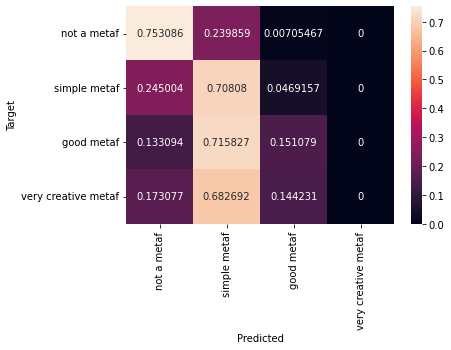

In [ ]:
# Scikit-Learn is transitioning to V1 but it's not available on Colab
# The changes modify how confusion matrices are plotted
def plot_cm(cm):
  classes = ['not a metaf', 'simple metaf', 'good metaf', 'very creative metaf']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sn.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

cm = confusion_matrix(raw_dataset['test']['label'], test_pred2, normalize='true')
plot_cm(cm)

In [ ]:
test_pred = savedmodel(raw_dataset['test']['sentence'])

In [ ]:
type(test_pred)

test_results_bertimbau_large =  pd.DataFrame(test_pred)

test_results_bertimbau_large.head()

test_results_bertimbau_large.to_csv("/content/drive/MyDrive/unicamp - IA024 /projeto_metaf/test_results_bertimbau_large.csv")


In [ ]:
!zip -r /content/model_bertimbau_base.zip /content/training_dir/checkpoint-1190/

  adding: content/training_dir/checkpoint-1190/ (stored 0%)
  adding: content/training_dir/checkpoint-1190/tokenizer.json (deflated 72%)
  adding: content/training_dir/checkpoint-1190/vocab.txt (deflated 52%)
  adding: content/training_dir/checkpoint-1190/optimizer.pt (deflated 23%)
  adding: content/training_dir/checkpoint-1190/training_args.bin (deflated 48%)
  adding: content/training_dir/checkpoint-1190/scheduler.pt (deflated 49%)
  adding: content/training_dir/checkpoint-1190/trainer_state.json (deflated 62%)
  adding: content/training_dir/checkpoint-1190/special_tokens_map.json (deflated 42%)
  adding: content/training_dir/checkpoint-1190/config.json (deflated 55%)
  adding: content/training_dir/checkpoint-1190/rng_state.pth (deflated 27%)
  adding: content/training_dir/checkpoint-1190/pytorch_model.bin (deflated 7%)
  adding: content/training_dir/checkpoint-1190/tokenizer_config.json (deflated 44%)


In [ ]:
from google.colab import files
files.download("/content/model_bertimbau_base.zip")